In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 데이터 생성
dim = 3
points1 = np.random.randn(80, dim) #3차원 랜덤 포인트 80개
points2 = np.random.randn(20, dim) + np.array([5, 5, 5]) #중심점을 5,5,5 만큼 옮긴 새로운 클러스터
points3 = np.random.randn(20, dim) + np.array([10, -5,  0]) #중심점을 10,-5,0 만큼 옮긴 새로운 클러스터
points = np.concatenate( (points1, points2, points3) )#points 123을 다합친 어레이

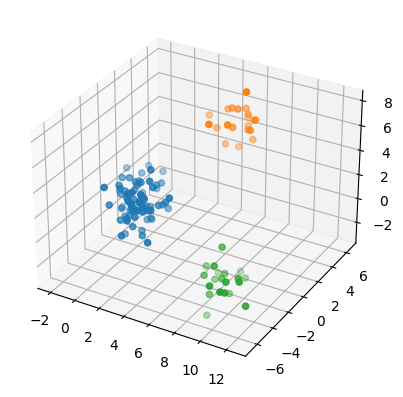

In [10]:
#시각화
fig = plt.figure()
ax = fig.add_subplot(projection='3d')#3차원 만들기

#ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(points1[:,0],points1[:,1],points1[:,2])
ax.scatter(points2[:,0],points2[:,1],points2[:,2])
ax.scatter(points3[:,0],points3[:,1],points3[:,2])

plt.show()

In [11]:
def kmeans(k, points):

  prev_assignments = []


# 1. 임의로 k개의 점을 중심점으로 선택 (forgy),랜덤 centroids 추출
  centroids = points[np.random.choice(len(points),size = k,replace = False)]

  for epoch in range(10):

    #각 points가 어느 centroid랑 가장 가까운지게산 = 어느 클러스터에 속하는지
    assignments = []

    for p in points:
      min_dist = 9e9
      min_cid = -1
      for cid, c in enumerate(centroids):
        dist = ((c-p)**2).sum()#centroid와의 거리
        if dist<min_dist:
          min_dist = dist
          min_cid = cid
      assignments.append(min_cid)
    # assignments 기준으로 새로운 centroid 계산
    centroids = np.array([points[np.array(assignments)==cid].mean(axis =0) for cid, c in enumerate(centroids)])
    #변경되었는지 확인
    if prev_assignments == assignments:
      break

    prev_assignments = assignments
  return assignments, centroids





In [12]:
assignments, centroids = kmeans(3,points)
print(assignments)
print(centroids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[10.25531214 -5.09395794 -0.33795293]
 [ 0.16599785 -0.10104718  0.12548267]
 [ 5.03496073  5.05884318  5.24393835]]


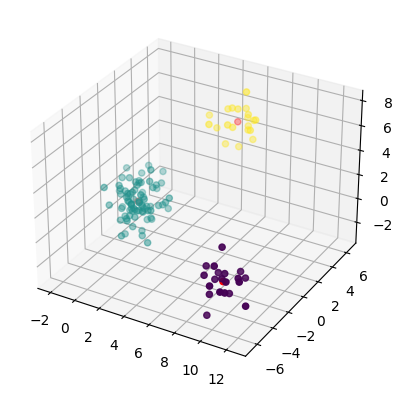

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:,0],points[:,1],points[:,2], c = assignments)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2], c = "red")


plt.show()

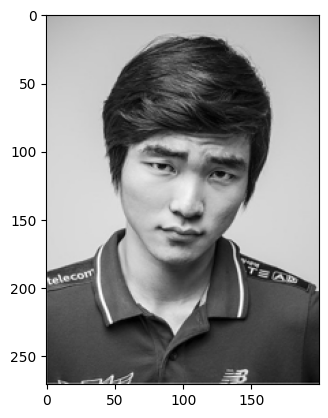

In [14]:
from PIL import Image

im = Image.open("img.jpg")#이미지 열기
width = 200
height = im.height*200//im.width
im = im.resize((width,height))#비율을 유지하고 이미지 사이즈 조절
plt.imshow(im)
plt.show()

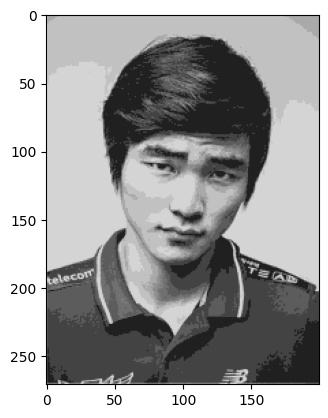

In [15]:
pixels = np.array(im).reshape((-1,3))#이미지 픽셀화
k=10
assignments, centroids = kmeans(k,pixels)#kmeans 실행

for a, i in zip(assignments, range(pixels.shape[0])):#kmeans결과를 이미지로 변환
 pixels[i] = centroids[a]
# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3))
plt.imshow(im_remastered)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


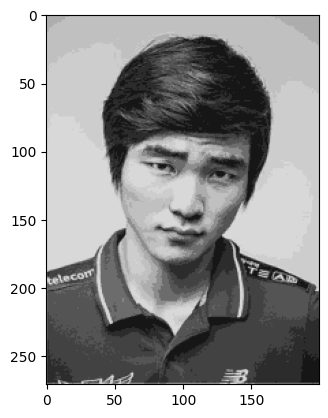

In [16]:
#sklearn
from sklearn.cluster import KMeans
pixels = np.array(im).reshape((-1,3))#이미지 픽셀화

kmeans = KMeans(n_clusters =10)#k=10
kmeans.fit(pixels)#학습

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):#kmeans결과를 이미지로 변환
 pixels[i] = kmeans.cluster_centers_[a]
# 바뀐 그림 출력

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3))
plt.imshow(im_remastered)
plt.show()

